In [99]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import collections
import seaborn as sns
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure, from_networkx
from bokeh.palettes import Spectral4
from bokeh.models import (Plot, Range1d, Circle, EdgesAndLinkedNodes, MultiLine,
                          NodesAndLinkedEdges, HoverTool, BoxZoomTool, TapTool,
                          WheelZoomTool, PanTool, ResetTool)
import random

### Task A

* Task A: analysis of cost. You can take two approaches (and preferably both) for this: (a) an algorithmic/complexity analysis of your algorithm, for example using Big O notation with respect to the input size; and (b) an experimental measurement of how long it takes for your code to build the network. For the latter, you can use any additional libraries you need for timing execution time of functions or cells, and then calculate averages, standard deviations, etc. It would be good if your experimental analysis shows these timings with respect to different input sizes, e.g. taking 10, 100, 1000 or 10000 input observations; and then plot how the cost changes with increasing input size. You can use that plot to justify if your algorithm is logarithmic, linear, quadratic, exponential, etc.
* Task A: data structures. This is just to explain how you decided to encode your network (e.g. adjacency matrix, adjacency list, edge list, etc.) and the limitations of that encoding. For example, an edge list of integer nodes cannot store user names on itself. If you used additional data structures to store any supplemental information to the network, please describe them here.

In [2]:
properties_df = pd.read_csv("PROPERTIES.csv")
properties_df

,thread_subject,username,page_name
0,How to distinguish federal-level powers,Arctic.gnome,PropertytalkP1001.json
1,RFC,Circeus,PropertytalkP1001.json
2,RFC,Jane023,PropertytalkP1001.json
3,Use for public offices,Jura1,PropertytalkP1001.json
4,Use for non-public offices,Arctic.gnome,PropertytalkP1001.json
...,...,...,...
13393,Merging with [[Property:P7]],23PowerZ,PropertytalkP9.json
13394,Merging with [[Property:P7]],Haplology,PropertytalkP9.json
13395,Merging with [[Property:P7]],SPQRobin,PropertytalkP9.json
13396,Merging with [[Property:P7]],Andrew Gray,PropertytalkP9.json


In [90]:
# Define two dictionaries to store the network representation
netwrk_dict = {}
ids = {} # names as keys
nodes = []

# Iterate over each row in the dataframe
for _, row in properties_df.iterrows():
    
    # Create a candidate key made up of the thread subject and page name
    candidate_key = row["thread_subject"] + row["page_name"]
    username = row["username"]
    
    # Check if the user name is in the "ids" dictionary
    # If not, assign a new unique ID and add to the "ids" dictionary
    if username not in ids.keys():
        ids[username] = len(ids)
    
    # Check if the candidate key is in the "netwrk_dict" dictionary
    # If not, create a new entry with the user's ID as its first value
    if candidate_key not in netwrk_dict.keys():
        netwrk_dict[candidate_key] = [ids[username]]
    
    # If the candidate key exists, check if the user's ID is in its value list
    # If not, add it to the list
    else:
        if ids[username] not in netwrk_dict[candidate_key]:
            netwrk_dict[candidate_key].append(ids[username])
            
    # Check if the user's ID is in the "nodes" list
    # If not, add it to the list
    if ids[username] not in nodes:
        nodes.append(ids[username])

In [4]:
edges=[]
for lst in netwrk_dict.values():
    if len(lst) > 1:
        for subset in itertools.combinations(lst, 2):
            if tuple(sorted(subset)) not in edges:
                edges.append(tuple(sorted(subset)))

In [5]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [29]:
# Define two dictionaries to store the network representation
netwrk2_dict = {}

# Iterate over each row in the dataframe
for _, row in properties_df.iterrows():
    
    # Create a candidate key made up of the thread subject and page name
    candidate_key = row["page_name"]
    username = row["username"]
    
    # Check if the candidate key is in the "netwrk_dict" dictionary
    # If not, create a new entry with the user's ID as its first value
    if candidate_key not in netwrk2_dict.keys():
        netwrk2_dict[candidate_key] = [ids2[username]]
    
    # If the candidate key exists, check if the user's ID is in its value list
    # If not, add it to the list
    else:
        if ids[username] not in netwrk2_dict[candidate_key]:
            netwrk2_dict[candidate_key].append(ids[username])
            

In [30]:
edges2=[]
for lst in netwrk2_dict.values():
    if len(lst) > 1:
        for subset in itertools.combinations(lst, 2):
            if tuple(sorted(subset)) not in edges2:
                edges2.append(tuple(sorted(subset)))

In [31]:
G2 = nx.Graph()
G2.add_nodes_from(nodes2)
G2.add_edges_from(edges2)

In [68]:
plot1 = Plot(width=1600, height=800,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot1.title.text = "Interactive plot demo"

plot1.add_tools(
    HoverTool(tooltips=None),
    TapTool(), BoxZoomTool(), WheelZoomTool(), PanTool(), ResetTool())
graph_renderer = from_networkx(
    G, nx.spring_layout, scale=2, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=2, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=3, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=2, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=1)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=1)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=1)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot1.renderers.append(graph_renderer)

#output_file("interactive_graphs1.html")
show(plot1)

In [70]:
plot2 = Plot(width=1600, height=800,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot2.title.text = "Interactive plot demo"

plot2.add_tools(
    HoverTool(tooltips=None),
    TapTool(), BoxZoomTool(), WheelZoomTool(), PanTool(), ResetTool())
graph_renderer = from_networkx(
    G2, nx.spring_layout, scale=2, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=2, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=3, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=2, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=1)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=1)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=1)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot2.renderers.append(graph_renderer)

#output_file("interactive_graphs2.html")
show(plot2)

In [11]:
print(G.number_of_nodes())
print(G.number_of_edges())

1942
9198


- What data structures did you choose to represent this network? How do you keep additional information that cannot be directly encoded as nodes and edges?
- What was your algorithmic approach for building the network?
- What was the cost (in time, with respect to the input size, etc.) of building the network?

### Task B

- basic metric calculations
- random network of same node size
- small world network of same node size
- rebuild network with a different definition

In [12]:
def print_graph_statistics(graph):

    print("Number of edges: {}".format(
        graph.number_of_edges()
    ))
    print("Number of nodes: {}".format(
        graph.number_of_nodes()
    ))
    print("Number of connected components: {}".format(
        nx.number_connected_components(graph)
    ))
    print("Clustering coefficient: {}".format(
        nx.algorithms.cluster.average_clustering(graph)
    ))
    print("Average Degree: {}".format(
        sum(degree[1] for degree in graph.degree)/graph.number_of_nodes()
    ))
    
    Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
    G0 = graph.subgraph(Gcc[0])
    
    print("-------------------------------------\nMetrics of Largest Connected Component\n-------------------------------------")
    
    print("Number of edges: {}".format(
        G0.number_of_edges()
    ))
    print("Number of nodes: {}".format(
        G0.number_of_nodes()
    ))
    print("{}% of the nodes within the entire network are in the largest connected component".format(
        round((G0.number_of_nodes()/graph.number_of_nodes())*100, 2)
    ))
    
    print("Average path length: {}".format(
        nx.average_shortest_path_length(G0)
    ))
    
    print("Clustering coefficient: {}".format(
        nx.algorithms.cluster.average_clustering(G0)
    ))
    print("Average Degree: {}".format(
        sum(degree[1] for degree in G0.degree)/G0.number_of_nodes()
    ))
    
    try:  # attempt to compute the diameter of the graph
        diam1 = nx.algorithms.approximation.distance_measures.diameter(G0)
        print("Graph diameter (approximated): {}".format(diam1))
    except:  # an error has  occurred
        print("\nERROR: Could not compute the diameter of the graph.")
        
    try:  # attempt to compute the diameter of the graph
        diam2 = nx.algorithms.distance_measures.diameter(G0)
        print("Graph diameter (calculated): {}".format(diam2))
    except:  # an error has  occurred
        print("\nERROR: Could not compute the diameter of the graph.")
        
    degs = sorted(G.degree, key=lambda x: x[1], reverse=True)
    print("Node {} has the largest degree in the network of {}.".format(
        degs[0][0], degs[0][1]
    ))

    degree_sequence = [d for n, d in graph.degree()]
    sum(degree_sequence)/len(degree_sequence)

    degree_count = collections.Counter(degree_sequence)
    deg, cnt = zip(*degree_count.items())

    fig, ax = plt.subplots(figsize=(15,5))

    plt.bar(deg, cnt, width=1.2, color="b")
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()

#- What is the degree distribution of the network?

In [13]:
def centrality_df(input_list):
    input_list.sort(key=lambda a: a[1], reverse=True)
    df = pd.DataFrame(input_list[0:9])
    df.rename(columns={0: 'nodes', 1: 'Centrality'}, inplace=True)
    
    df["nodes"]=df["nodes"].values.astype('str')
    df["Centrality"] = df["Centrality"].round(decimals=4)
    
    return df

In [14]:
def centrality_measures(graph):
    
    deg_cent_df = centrality_df(list(nx.degree_centrality(graph).items()))
    eigen_cent_df = centrality_df(list(nx.eigenvector_centrality(graph).items()))
    close_cent_df = centrality_df(list(nx.closeness_centrality(graph).items()))
    between_cent_df = centrality_df(list(nx.betweenness_centrality(graph).items()))

    fig, axs = plt.subplots(2, 2, figsize=(15,15))

    sns.barplot(ax=axs[0,0], x='Centrality', y='nodes', color='steelblue', data=deg_cent_df, orient="h")
    axs[0,0].bar_label(axs[0,0].containers[0])
    axs[0,0].set_title("Degree Centrality")

    sns.barplot(ax=axs[0,1], x='Centrality', y='nodes', color='steelblue', data=eigen_cent_df, orient="h")
    axs[0,1].bar_label(axs[0,1].containers[0])
    axs[0,1].set_title("EigenVector Centrality")

    sns.barplot(ax=axs[1,0], x='Centrality', y='nodes', color='steelblue', data=close_cent_df, orient="h")
    axs[1,0].bar_label(axs[1,0].containers[0])
    axs[1,0].set_title("Closeness Centrality")

    sns.barplot(ax=axs[1,1], x='Centrality', y='nodes', color='steelblue', data=between_cent_df, orient="h")
    axs[1,1].bar_label(axs[1,1].containers[0])
    axs[1,1].set_title("Betweenness Centrality")

    fig.suptitle('Centrality Measures', fontsize=24)

In [15]:
p = 9189 / (1942*1941/2)

ER_graph = nx.erdos_renyi_graph(n=1942, p=p)
WS_graph = nx.watts_strogatz_graph(n=1942, k=2, p=0.1)
SF_graph = nx.Graph(nx.scale_free_graph(n=1942, delta_in=0, delta_out=0).to_undirected())

Number of edges: 9198
Number of nodes: 1942
Number of connected components: 304
Clustering coefficient: 0.4705452909451652
Average Degree: 9.472708547888775
-------------------------------------
Metrics of Largest Connected Component
-------------------------------------
Number of edges: 9174
Number of nodes: 1618
83.32% of the nodes within the entire network are in the largest connected component
Average path length: 2.900909908856227
Clustering coefficient: 0.5592082540268917
Average Degree: 11.339925834363411

ERROR: Could not compute the diameter of the graph.
Graph diameter (calculated): 7
Node 3 has the largest degree in the network of 627.


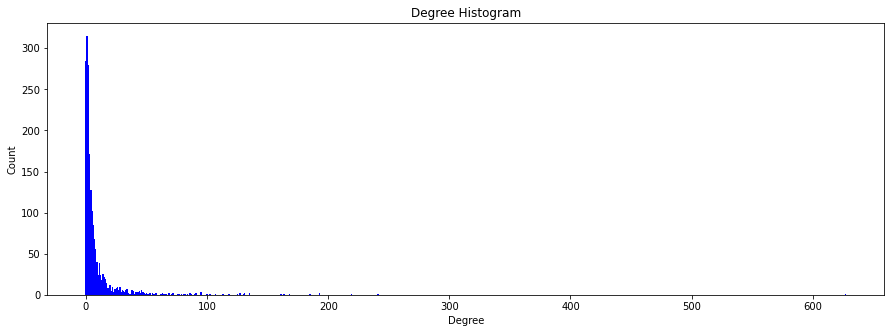

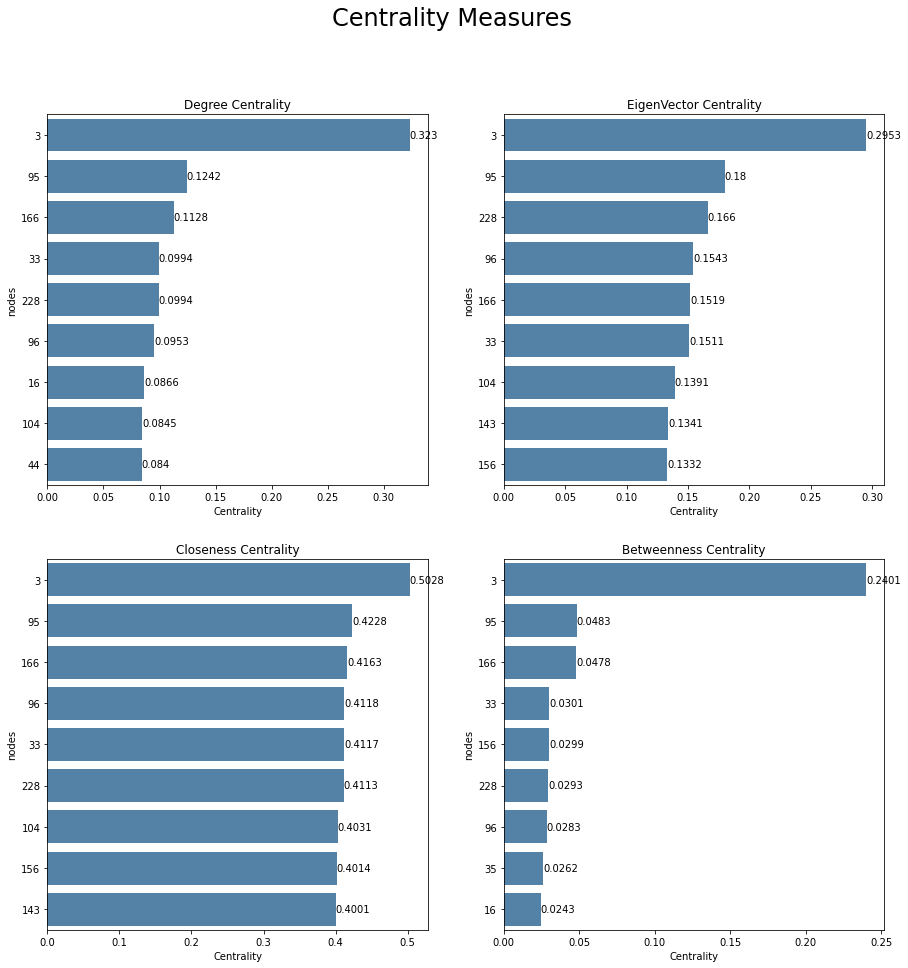

In [16]:
print_graph_statistics(G)
centrality_measures(G)

Number of edges: 47326
Number of nodes: 1942
Number of connected components: 64
Clustering coefficient: 0.7466001178572761
Average Degree: 48.739443872296604
-------------------------------------
Metrics of Largest Connected Component
-------------------------------------
Number of edges: 47318
Number of nodes: 1872
96.4% of the nodes within the entire network are in the largest connected component
Average path length: 2.305505305906161
Clustering coefficient: 0.7729152932045033
Average Degree: 50.5534188034188

ERROR: Could not compute the diameter of the graph.
Graph diameter (calculated): 4
Node 3 has the largest degree in the network of 627.


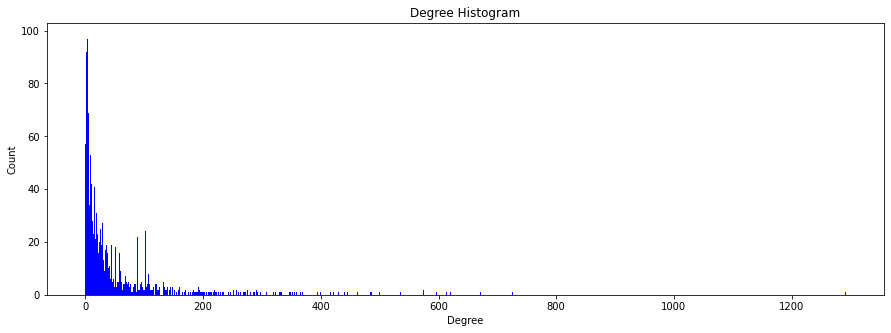

KeyboardInterrupt: 

In [32]:
print_graph_statistics(G2)
centrality_measures(G2)

Number of edges: 9210
Number of nodes: 1942
Number of connected components: 1
Clustering coefficient: 0.004922188240190497
Average Degree: 9.485066941297632
-------------------------------------
Metrics of Largest Connected Component
-------------------------------------
Number of edges: 9210
Number of nodes: 1942
100.0% of the nodes within the entire network are in the largest connected component
Average path length: 3.6185866161973905
Clustering coefficient: 0.004922188240190497
Average Degree: 9.485066941297632

ERROR: Could not compute the diameter of the graph.
Graph diameter (calculated): 6
Node 3 has the largest degree in the network of 627.


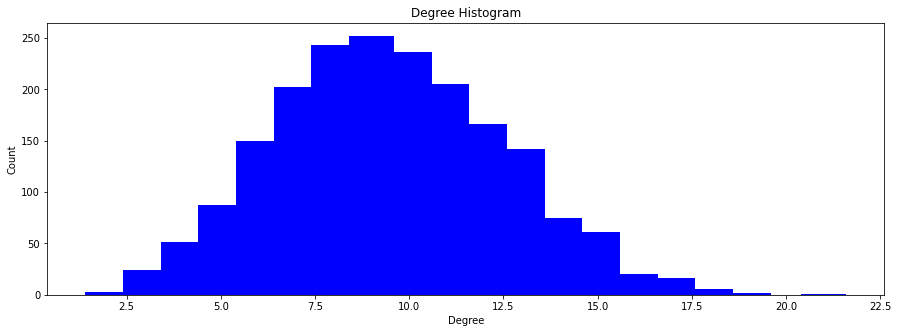

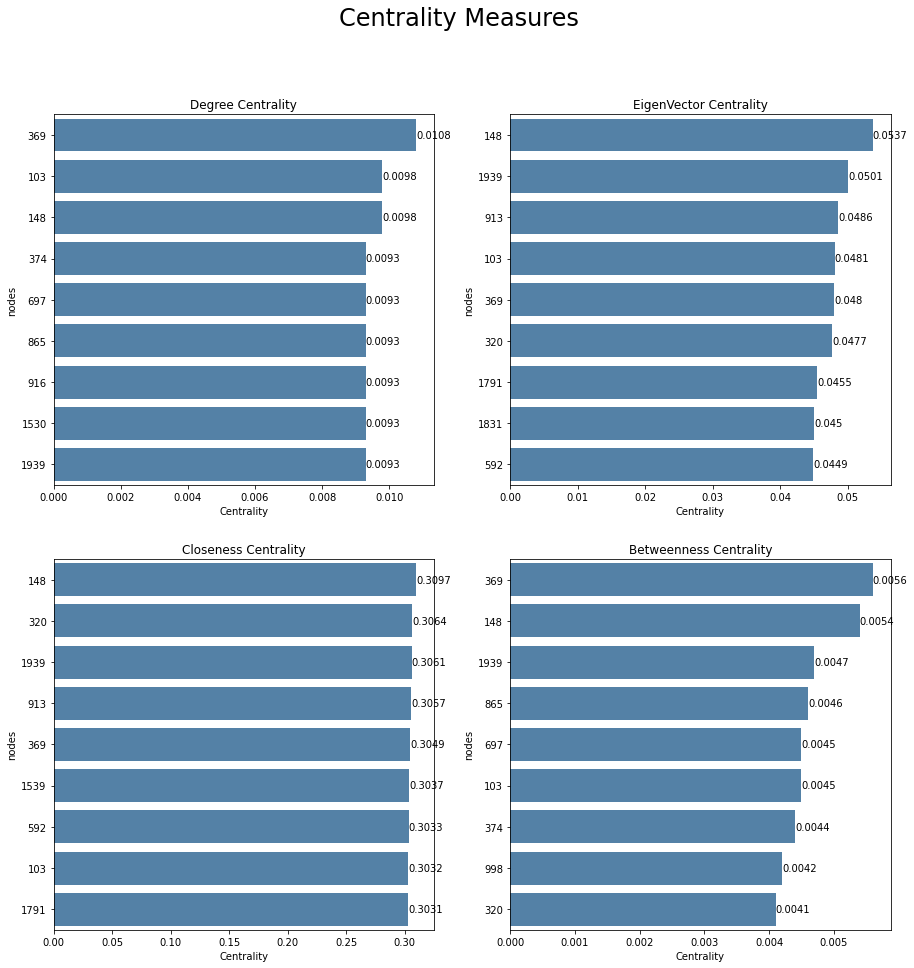

In [18]:
print_graph_statistics(ER_graph)
centrality_measures(ER_graph)

Number of edges: 1942
Number of nodes: 1942
Number of connected components: 5
Clustering coefficient: 0.0
Average Degree: 2.0
-------------------------------------
Metrics of Largest Connected Component
-------------------------------------
Number of edges: 1522
Number of nodes: 1522
78.37% of the nodes within the entire network are in the largest connected component
Average path length: 81.22985949661377
Clustering coefficient: 0.0
Average Degree: 2.0

ERROR: Could not compute the diameter of the graph.
Graph diameter (calculated): 233
Node 3 has the largest degree in the network of 627.


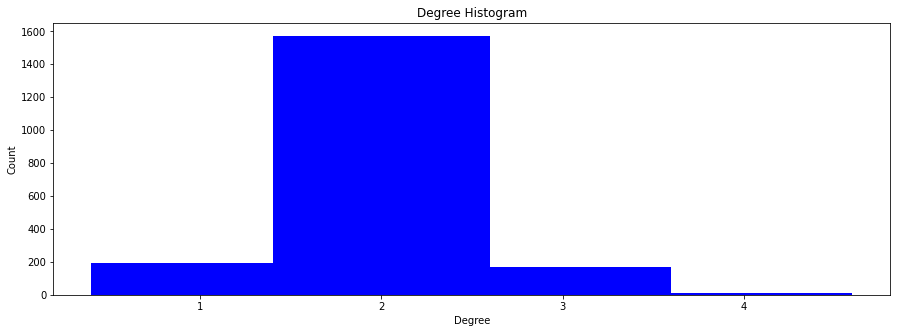

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [19]:
print_graph_statistics(WS_graph)
centrality_measures(WS_graph)

Number of edges: 3086
Number of nodes: 1942
Number of connected components: 1
Clustering coefficient: 0.18018345322950718
Average Degree: 3.1781668383110198
-------------------------------------
Metrics of Largest Connected Component
-------------------------------------
Number of edges: 3086
Number of nodes: 1942
100.0% of the nodes within the entire network are in the largest connected component
Average path length: 2.8510466591429666
Clustering coefficient: 0.18018345322950718
Average Degree: 3.1781668383110198

ERROR: Could not compute the diameter of the graph.
Graph diameter (calculated): 7
Node 3 has the largest degree in the network of 627.


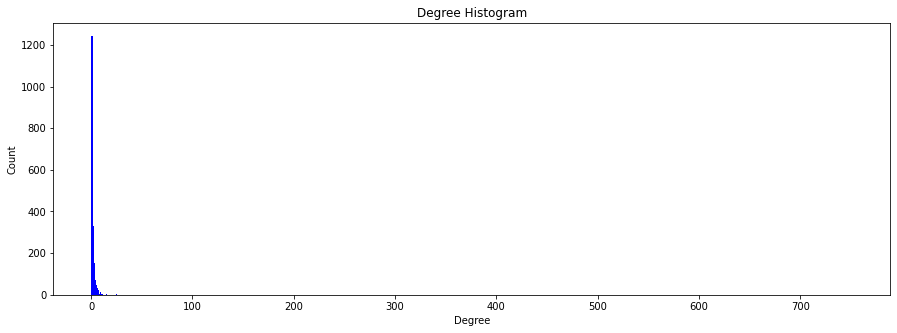

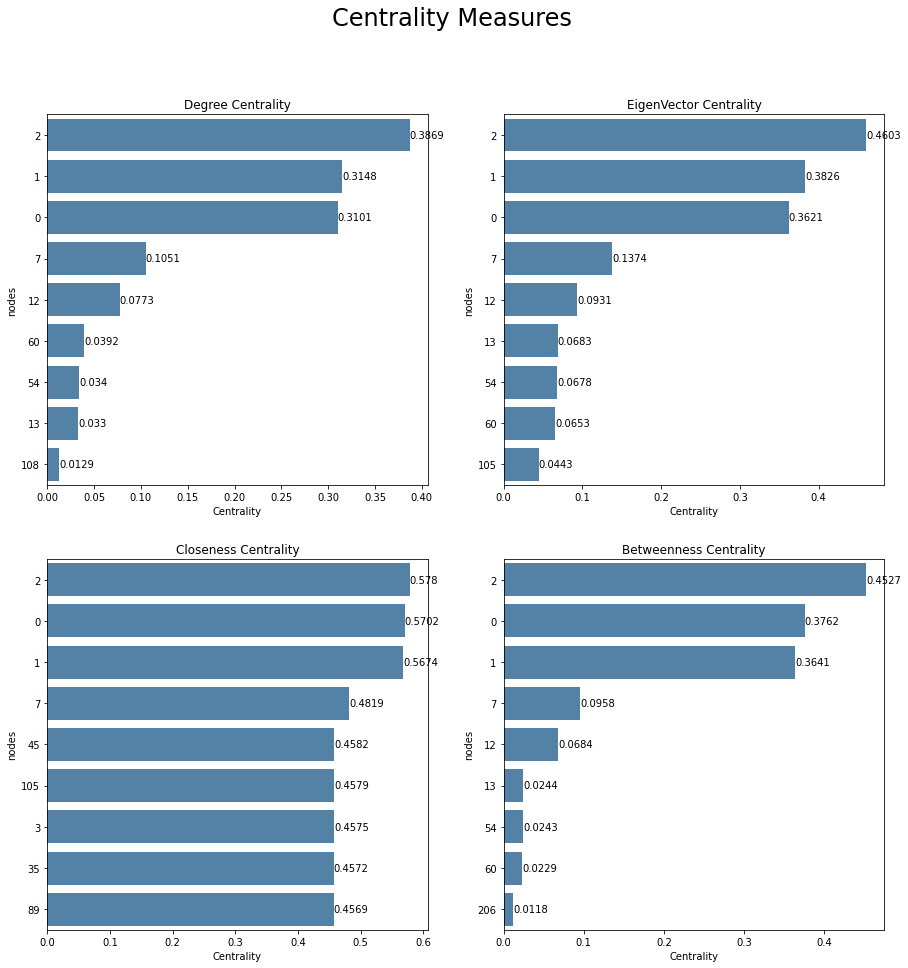

In [20]:
print_graph_statistics(SF_graph)
centrality_measures(SF_graph)

In [21]:
def node_level_descriptors(graph):

    degrees = [d for _, d in graph.degree()]
    ccoeffs = [d for _, d in nx.algorithms.cluster.clustering(graph).items()]
    ccentra = [d for _, d in nx.closeness_centrality(graph).items()]

    return {'degrees': degrees, 'ccoeffs': ccoeffs, 'ccentra': ccentra}

Calculate Normalized

In [22]:
graph_desc = node_level_descriptors(G)
ER_graph_desc = node_level_descriptors(ER_graph)
WS_graph_desc = node_level_descriptors(WS_graph)
SF_graph_desc = node_level_descriptors(SF_graph)

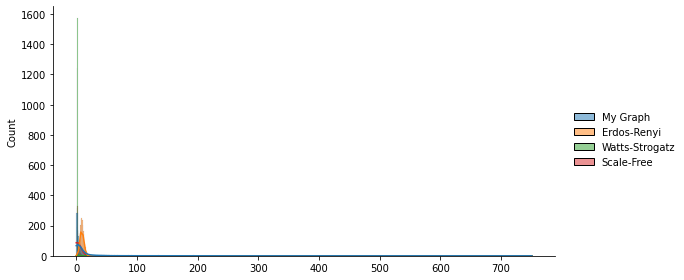

In [23]:
sns.displot({
    "My Graph": graph_desc["degrees"],
    "Erdos-Renyi": ER_graph_desc["degrees"],
    "Watts-Strogatz": WS_graph_desc["degrees"],
    "Scale-Free": SF_graph_desc["degrees"]},
    height=4, aspect=2, kde=True) # kind="kde"

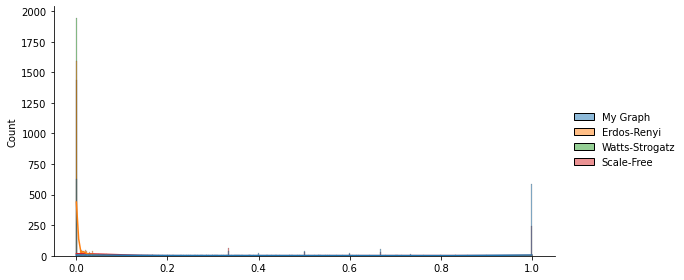

In [24]:
sns.displot({
    "My Graph": graph_desc["ccoeffs"],
    "Erdos-Renyi": ER_graph_desc["ccoeffs"],
    "Watts-Strogatz": WS_graph_desc["ccoeffs"],
    "Scale-Free": SF_graph_desc["ccoeffs"]},
    height=4, aspect=2, kde=True) # kind="kde"

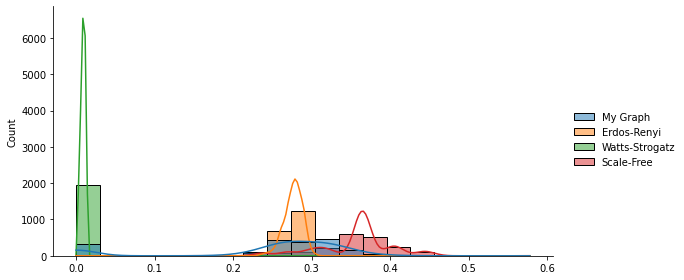

In [25]:
sns.displot({
    "My Graph": graph_desc["ccentra"],
    "Erdos-Renyi": ER_graph_desc["ccentra"],
    "Watts-Strogatz": WS_graph_desc["ccentra"],
    "Scale-Free": SF_graph_desc["ccentra"]},
    height=4, aspect=2, kde=True) # kind="kde"

- What are the characteristic properties and relevant metrics and distributions of this Wikidata editor network?
- How different is this network from a random network?
- If you take this network as a complete and representative description of editor networks in collaborative knowledge projects like Wikipedia and Wikidata, what does it tell you about the way editors talk among themselves and their social activity and connections?
- How does your analysis change (metrics, comparison to random, social behaviour) if we now consider that two editors are connected iff they have both contributed to any thread in the same page, but not necessarily to the same thread?

### Task C

A few additional clarifications about CW1, in particular regarding Task C:

* There is no additional "time" information that we'll supply besides the CSVs (and the entailed networks you've extracted from them). When we say in the instructions that users have "commented more than usual on the same day", we really mean any definition of "trolling" that you think makes sense to consider. Some valid examples here are, for example, to count how many times two users have interacted in different threads and pages in a weighted graph, as a reflection of these two users possibly fighting and chasing each other over Wikidata; or to consider if two users have both many comments in different threads in the same page. You can be as creative as you like, as long as you can argue your choice.
* To answer the questions, think about metrics and characteristics of Lesson 5 (homophily, similarity in metrics such as centrality, degree, etc.) as well as the parameters we have seen in cascading (e.g. network topology, choice of initial adopters, value of the threshold q). Try to give both theoretical and empirical justifications (e.g. via epidemic models), and make all the assumptions that you consider necessary (e.g. "I assume that the threshold q<=1/2") but it will be valuable if you can give different results over different assumptions.

We hope this helps in clarifying. This task is purposefully ambiguous to allow you to be creative in your responses, so please be as concise and explicit as you can in your reports to reflect your choices and justifications.

weighted graph, weight determines probability of trolling
no way to judge baseline - although would be nice. You could determin probability as a function of the percentage over baseline and common comments
also, if someone is a troll they are more likely to troll everyday

In [94]:
weighted_network_dict = netwrk_dict
id_pairs = {}

# Iterate over each thread and the list of IDs that commented on it
for _, ids in weighted_network_dict.items():
    
    # Iterate over all pairs of IDs in the list
    for i, id1 in enumerate(ids):
        for j, id2 in enumerate(ids[i+1:], start=i+1):
            
            # If this pair of IDs has not been seen before, add it to the dictionary with a weight of 1
            if (id1, id2) not in id_pairs and (id2, id1) not in id_pairs:
                id_pairs[(id1, id2)] = 1
            
            # If this pair of IDs has been seen before, increment its weight by 1
            else:
                if (id1, id2) in id_pairs:
                    id_pairs[(id1, id2)] += 1
                else:
                    id_pairs[(id2, id1)] += 1

# Convert the dictionary to a list of lists
weighted_edges = [(id1, id2, 1/weight) for (id1, id2), weight in id_pairs.items()]

In [95]:
weighted_G = nx.Graph()
weighted_G.add_nodes_from(nodes)
weighted_G.add_weighted_edges_from(weighted_edges)

In [73]:
plot3 = Plot(width=1600, height=800,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot3.title.text = "Interactive plot demo"

plot3.add_tools(
    HoverTool(tooltips=None),
    TapTool(), BoxZoomTool(), WheelZoomTool(), PanTool(), ResetTool())
graph_renderer = from_networkx(
    weighted_G, nx.spring_layout, scale=2, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=2, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=3, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=2, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=1)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=1)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=1)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot3.renderers.append(graph_renderer)

#output_file("interactive_graphs2.html")
show(plot3)

In [96]:
sorted_weight = sorted(nx.connected_components(weighted_G), key=len, reverse=True)
weighted_largest_component = weighted_G.subgraph(sorted_weight[0])

sorted_weight = sorted(nx.connected_components(G), key=len, reverse=True)
unweighted_largest_component = G.subgraph(sorted_weight[0])

In [103]:
random_node_1, random_node_2 = random.sample(list(G.nodes()), 2)

# Calculate distance in unweighted graph
unweighted_distance = nx.shortest_path_length(unweighted_largest_component, source=random_node_1, target=random_node_2)

# Calculate distance in weighted graph
weighted_distance = nx.bellman_ford_path_length(weighted_largest_component, source=random_node_1, target=random_node_2, weight='weight')

print("Distance in unweighted graph:", unweighted_distance)
print("Distance in unweighted graph:", weighted_distance)
#print("From: {}, To: {}".format(list(ids.keys())[list(ids.values()).index(random_node_1)], list(ids.keys())[list(ids.values()).index(random_node_2)]))
#print("Distance in weighted graph:", weighted_distance)

Distance in unweighted graph: 3
Distance in unweighted graph: 1.4464285714285714


In [85]:
try:
    weighted_distance = nx.bellman_ford_path_length(weighted_largest_component, source=random_node_1, target=random_node_2, weight='weight')
    print(path)
except NetworkXUnbounded:
    cycles = nx.simple_cycles(weighted_largest_component)
    for cycle in cycles:
        print(cycle)  # do whatever you prefer here of course

NameError: name 'NetworkXUnbounded' is not defined

In [81]:
import random

# calculate centrality metric for each editor
centrality = nx.eigenvector_centrality(G)

# define baseline period for comment frequency
baseline_period = 30

# simulate Independent Cascade model to detect controversial topics
def simulate_ic_model(graph, seeds, p, num_simulations):
    results = {node: 0 for node in graph.nodes()}
    for i in range(num_simulations):
        active_nodes = set(seeds)
        new_active_nodes = set(seeds)
        while len(new_active_nodes) > 0:
            current_nodes = list(new_active_nodes)
            new_active_nodes = set()
            for node in current_nodes:
                for neighbor in G.neighbors(node):
                    if neighbor not in active_nodes and random.random() < p:
                        new_active_nodes.add(neighbor)
                        active_nodes.add(neighbor)
        for node in active_nodes:
            results[node] += 1
    return
